In [78]:
import numpy
import pylab
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = 'white'

In [79]:
path = '/home/necst/data/experiments/logger/loatt_sweep/20181011_080142'

In [80]:
p = numpy.loadtxt(path + '/power.txt')
loatt_cur = numpy.loadtxt(path + '/loatt.txt')
sis_cur = numpy.loadtxt(path + '/sis_cur.txt')
t = numpy.loadtxt(path + '/datatime.txt')

In [81]:
#3l

_time = t-t[0]
_pm = p[:,0]
_loatt_cur = loatt_cur[:,2]
_cur = sis_cur[:,2]

ptime = []
pm = []
itime = []
loatt_cur = []
cur = []
interval_vol_time = 3 #一点の長さ
buf = 0.1

In [82]:
_time

array([0.00000000e+00, 1.21612549e-02, 2.35803127e-02, ...,
       3.08311320e+02, 3.08322988e+02, 3.08333965e+02])

In [83]:
proop = int(_time[-1]/interval_vol_time)
for i in range(proop):
    ptime.append(_time[(i*interval_vol_time + buf < _time) & (_time < (i + 1) * interval_vol_time - buf)] )
    pm.append(_pm[(i * interval_vol_time + buf < _time) & (_time < (i + 1)*interval_vol_time - buf)])
    
iroop = int(_time[-1]/interval_vol_time)
for i in range(iroop):
    itime.append(_time[(i*interval_vol_time + buf < _time) & (_time < (i + 1) * interval_vol_time - buf)] )
    loatt_cur.append(_loatt_cur[(i * interval_vol_time + buf < _time) & (_time < (i + 1) * interval_vol_time - buf)])
    cur.append(_cur[(i * interval_vol_time + buf < _time) & (_time < (i + 1) * interval_vol_time - buf)])

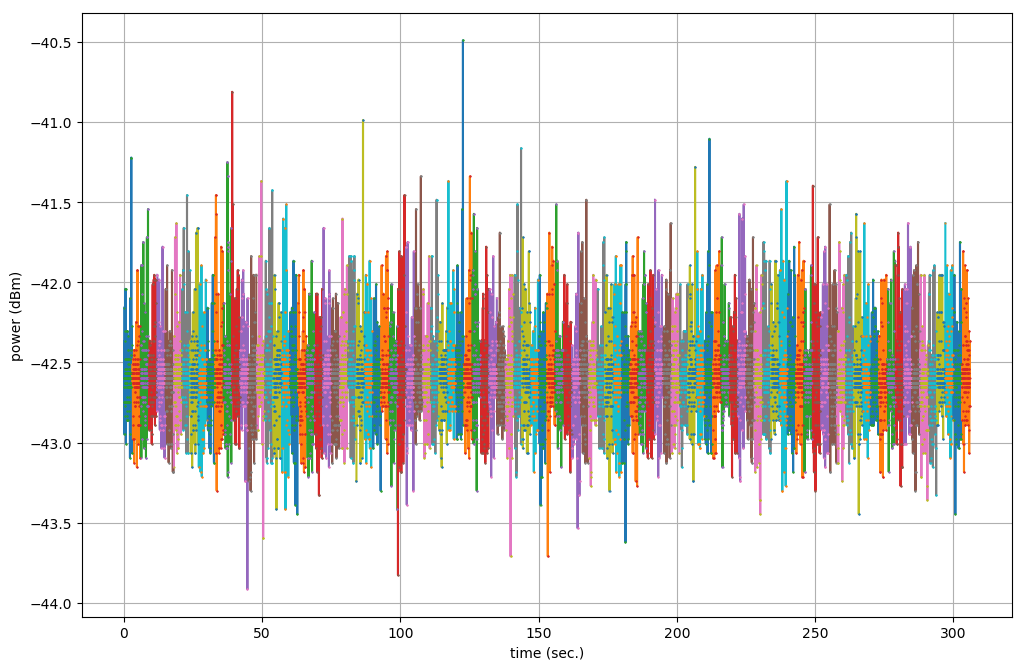

In [84]:
#横軸：経過時間　縦軸：パワー
fig = matplotlib.pyplot.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(111)
[ax.plot(ptime[i], pm[i]) for i in range(len(pm))]
[ax.plot(ptime[i], pm[i], '.', markersize=1) for i in range(len(pm))]
ax.set_xlabel('time (sec.)')
ax.set_ylabel('power (dBm)')
ax.grid()

In [85]:
print(len(_time))
print(len(cur))

27649
102


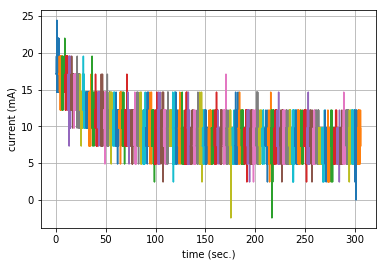

In [86]:
[matplotlib.pyplot.plot(itime[i], cur[i]) for i in range(len(cur))]
matplotlib.pyplot.xlabel('time (sec.)')
matplotlib.pyplot.ylabel('current (mA)')
matplotlib.pyplot.grid()

In [95]:
ave = 3
Thot = 300
Tcold = 77
pm_sorted = [numpy.array(sorted(_)) for _ in pm]
hot = numpy.array([numpy.mean(_[-ave-1:-1]) for _ in pm_sorted])
cold = numpy.array([numpy.mean(_[0:ave+1]) for _ in pm_sorted])
y = hot - cold
HOT = 10 ** (hot/10)
COLD = 10 ** (cold/10)
Y = 10 ** (y/10)
Trx = (Tcold * Y - Thot) / (1 - Y)
loatt_current = numpy.array([numpy.mean(_) for _ in loatt_cur])
current = numpy.array([numpy.mean(_) for _ in cur])

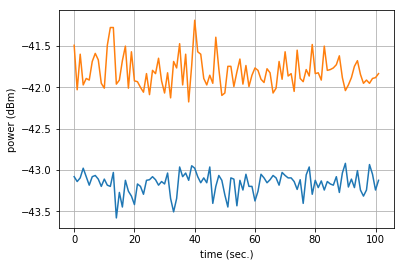

In [96]:
matplotlib.pyplot.plot(cold)
matplotlib.pyplot.plot(hot)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('time (sec.)')
matplotlib.pyplot.ylabel('power (dBm)')

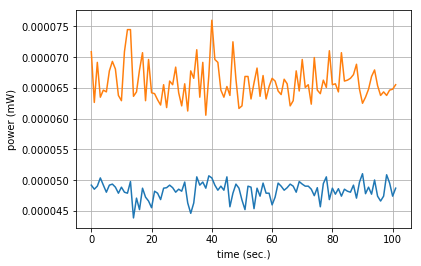

In [97]:
matplotlib.pyplot.plot(COLD)
matplotlib.pyplot.plot(HOT)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('time (sec.)')
matplotlib.pyplot.ylabel('power (mW)')

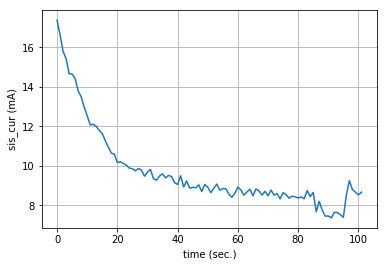

In [98]:
matplotlib.pyplot.plot(current)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('time (sec.)')
matplotlib.pyplot.ylabel('sis_cur (mA)')

In [99]:
len(hot)

102

ValueError: setting an array element with a sequence.

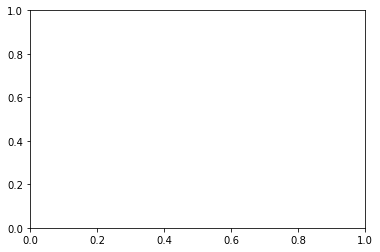

In [100]:
matplotlib.pyplot.plot(loatt_cur, cold)
#matplotlib.pyplot.plot(loatt_cur, hot)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('loatt (mA)')
matplotlib.pyplot.ylabel('power (dBm)')

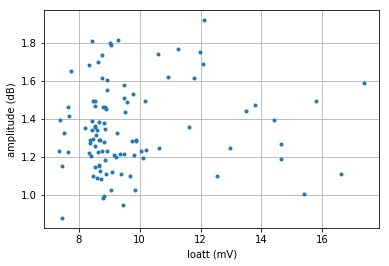

In [101]:
matplotlib.pyplot.plot(current, y, '.')
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('loatt (mV)')
matplotlib.pyplot.ylabel('amplitude (dB)')

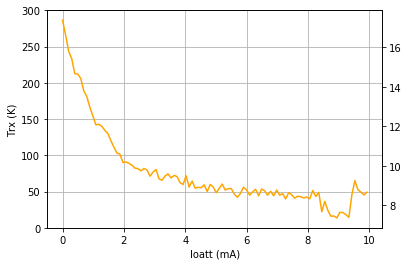

In [102]:
fig = matplotlib.pyplot.figure()
ax1 = fig.add_subplot(111)
ax1.plot(loatt_current, Trx, c='green', label='Trx')
ax2 = ax1.twinx()
ax2.plot(loatt_current, current, c='orange', label='SIS current')
ax1.grid()
ax1.set_ylim(0,300)
ax1.set_xlabel('loatt (mA)')
ax1.set_ylabel('Trx (K)')

In [ ]:
len(Trx)